# Standard PT model

Reduced unities.
Substrate potential and critical point of the total energy (mechanical instability).
To compare to Muser PRB 84 125419 (2011)

In [1]:
U0, a = 1, 2*pi
K = 0.4
v = 1
def Us(x):
    return -U0*np.cos(2*pi*x/a)
def Fs(x):
    return -2*pi*U0/a*np.sin(2*pi*x/a)
def U(x, t):
    return Us(x)+K/2*(x-v*t)**2

Len  (3770,) step 0.005000000000000782


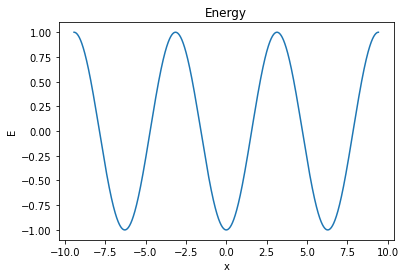

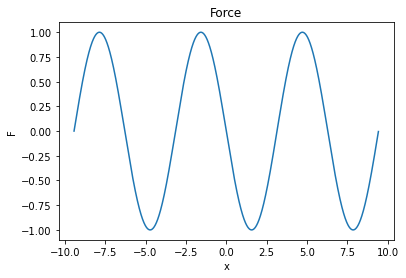

In [2]:
#xx = np.linspace(-2*pi, 2*pi, 2000)
xx = np.arange(-3*pi, 3*pi, 0.005) # Same sapcing as LAMMPS rigid estimation.
print("Len ", xx.shape, "step", xx[1]-xx[0])

plt.title('Energy')
plt.plot(xx, Us(xx))
plt.xlabel('x')
plt.ylabel('E')
plt.show()

plt.title('Force')
plt.plot(xx, Fs(xx))
plt.xlabel('x')
plt.ylabel('F')
plt.show()

# Save for fitted PES test
data = np.zeros((len(xx), 3))
data[:,0] = xx
data[:,1] = Us(xx)
data[:,2] = Fs(xx)
np.savetxt('fit_sinPES/out-sin.dat', data)

t= 0.00 t-a/2=-3.14 Umin=-1.00 Umax= 4.71 DeltaU= 5.71
-----------------------------
t= 3.14 t-a/2= 0.00 Umin= 0.38 Umax= 1.00 DeltaU= 0.62
-----------------------------
t= 4.27 t-a/2= 1.13 Umin=-0.43 Umax= 1.47 DeltaU= 1.90
-----------------------------


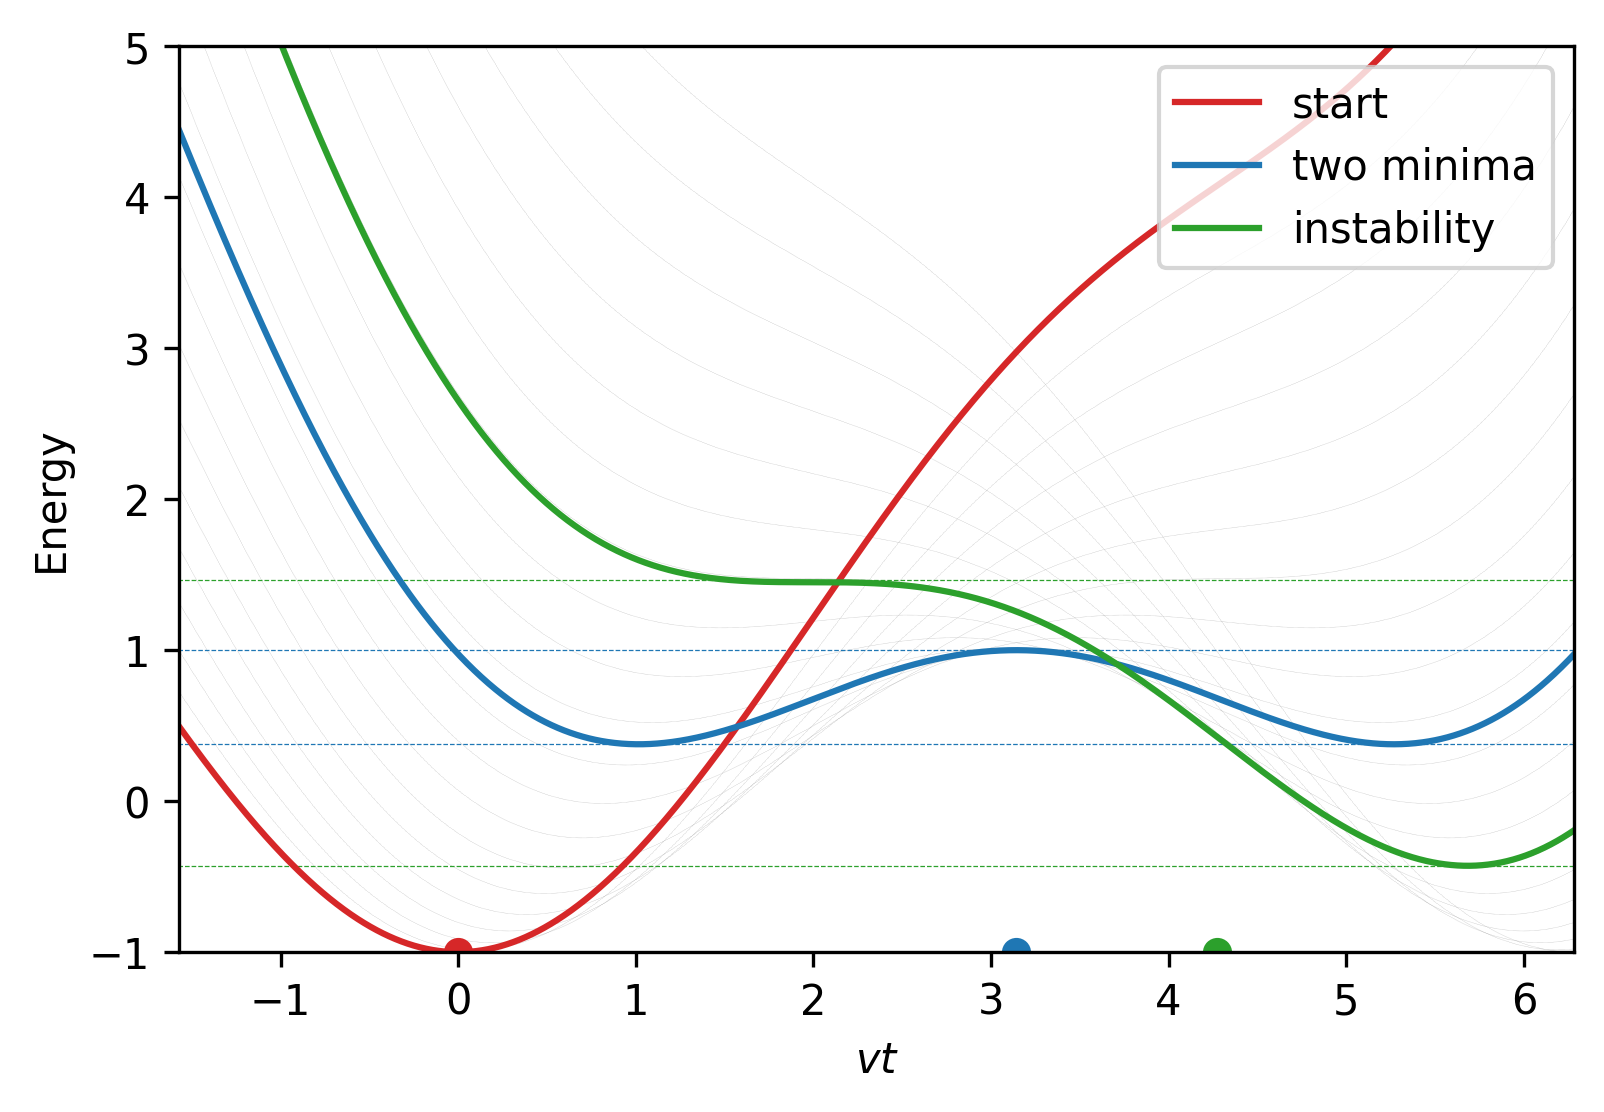

In [3]:

t0 = 0
for t0 in np.linspace(0, a, 20):
    plt.plot(xx, U(xx, t0), color='gray', lw=0.1, ls=':', zorder=-5)
    
cols = ['tab:red', 'tab:blue', 'tab:green', 'pink']
for i, (t0, lab) in enumerate(zip([0, a/2, 1.132+1/2*a],
                                  ['start', 'two minima', 'instability']
                                 )):
    plt.plot(xx, U(xx, t0), color=cols[i], label=lab)
    Um, UM = min(U(xx, t0)), max(U(xx, t0)[np.logical_and(xx>1.5, xx<5)])
    print("t=%5.2f t-a/2=%5.2f Umin=%5.2f Umax=%5.2f DeltaU=%5.2f" % (t0, t0-a/2, Um, UM, UM-Um))
    plt.plot([t0*v], -1, 'o', color=cols[i], zorder=1)
    if i>0: plt.hlines([Um, UM], *plt.xlim(), ls='--', color=cols[i], zorder=-1, lw=0.3)
    print('-'*29)
plt.xlabel(r'$vt$')
plt.ylabel('Energy')
plt.ylim([-1,5])
plt.legend(loc='upper right')
plt.xlim([-a/4, a])
plt.gcf().set_dpi(300)
plt.show()